In [5]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/permutations'

In [6]:
# %%bash

! mkdir $folder/barplots
!mkdir $folder/tidy
!mkdir $folder/size
!mkdir $folder/psi
# mkdir $folder/modalities_sizes

mkdir: cannot create directory `/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/permutations/barplots': File exists
mkdir: cannot create directory `/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/permutations/tidy': File exists
mkdir: cannot create directory `/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/permutations/size': File exists
mkdir: cannot create directory `/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/permutations/psi': File exists


In [7]:
import glob
import os

import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='ticks', context='paper')


In [8]:

dfs = []

for csv in sorted(glob.glob('{}/size/*.csv'.format(folder))):
    df = pd.read_csv(csv, header=None, names=['phenotype', 'modality', 'size'])
    df['iteration'] = int(os.path.basename(csv).split('.')[0].split('_')[1])
    dfs.append(df)
    
sizes = pd.concat(dfs, ignore_index=True)
# sizes.columns = 

In [9]:
sizes['modality'] = sizes['modality'].replace({'~1': 'included', '~0': 'excluded', 
                                               'multimodal': 'ambivalent'})

In [10]:
sizes.tail()

,phenotype,modality,size,iteration
7479,MN,uncategorized,28,999
7480,NPC,bimodal,5027,999
7481,NPC,included,14,999
7482,iPSC,bimodal,7841,999
7483,iPSC,included,6,999


In [11]:
import anchor

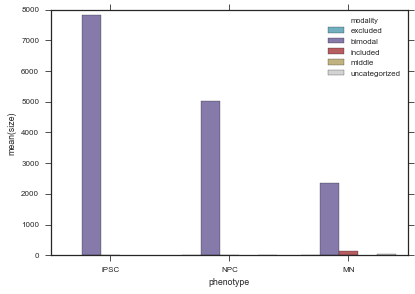

In [12]:
sns.barplot(x='phenotype', y='size', hue='modality', data=sizes, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE)

In [13]:
sizes.groupby(['phenotype', 'modality'])['size'].mean()

phenotype  modality     
MN         bimodal          2362.093093
           excluded            1.326180
           included          124.815816
           uncategorized      36.402402
NPC        bimodal          5022.109109
           excluded            1.000000
           included           18.865866
           uncategorized       1.000000
iPSC       bimodal          7838.965966
           included            8.034034
Name: size, dtype: float64

In [14]:
sns.set(style='ticks', context='paper')

In [26]:
figure_folder = 'figures'

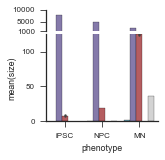

In [33]:
fig, axes = plt.subplots(figsize=(2, 2), nrows=2, gridspec_kw=dict(hspace=0.05, height_ratios=[0.2, 0.8]))
ax = axes[0]
sns.barplot(x='phenotype', y='size', hue='modality', data=sizes, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE, ax=ax)
ax.locator_params(nbins=3, axis='y')
ymin, ymax = ax.get_ylim()
# ax.set_ylim()
ax.set(xticks=[], xlabel='', ylim=(1000, ymax), ylabel='', yticks=[1000, 5000, 10000])
sns.despine(ax=ax, bottom=True)
ax.legend_.remove()

ax = axes[1]
sns.barplot(x='phenotype', y='size', hue='modality', data=sizes, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE, ax=ax)
ax.set_ylim(0, 125)
ax.locator_params(nbins=4, axis='y')
ax.legend_.remove()
sns.despine(ax=ax)
# fig.tight_layout()
# fig.s
fig.savefig('{}/permuted_modality_barplot_counts.pdf'.format(figure_folder))

In [34]:
percentages = sizes.copy()
percentages['percentage'] = percentages.groupby(['phenotype', 'iteration'])['size'].apply(lambda x: 100*x/x.sum())
percentages.head()

,phenotype,modality,size,iteration,percentage
0,MN,bimodal,2364,1,93.660856
1,MN,included,126,1,4.992076
2,MN,uncategorized,34,1,1.347068
3,NPC,bimodal,5020,1,99.583416
4,NPC,included,21,1,0.416584


In [35]:
percentages.groupby(['phenotype', 'modality'])['percentage'].mean()

phenotype  modality     
MN         bimodal          93.587903
           excluded          0.052544
           included          4.945297
           uncategorized     1.442291
NPC        bimodal          99.625255
           excluded          0.019837
           included          0.374248
           uncategorized     0.019837
iPSC       bimodal          99.897616
           included          0.102384
Name: percentage, dtype: float64

In [36]:
sns.set(style='ticks', context='paper')

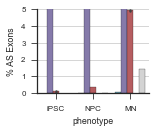

In [37]:

fig, ax = plt.subplots(figsize=(2, 1.5))

# ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=percentages, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE, ax=ax)
ax.legend_.set_visible(False)
ax.set(ylabel='% AS Exons')
ax.grid(axis='y')
sns.despine()
fig.savefig('{}/permuted_modalities_barplot.pdf'.format(figure_folder))

ax.set(ylim=(0, 5))
fig.savefig('{}/permuted_modalities_barplot_zoom.pdf'.format(figure_folder))

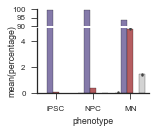

In [38]:
fig, axes = plt.subplots(figsize=(2, 1.5), nrows=2, gridspec_kw=dict(hspace=0.05, 
                                                                     height_ratios=[0.2, 0.8]))
ax = axes[0]
sns.barplot(x='phenotype', y='percentage', hue='modality', data=percentages, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE, ax=ax)
ax.locator_params(nbins=3, axis='y')
ax.set(xticks=[], xlabel='', ylim=(90, 100), ylabel='')#, yticks=[50, 75, 100])
sns.despine(ax=ax, bottom=True)
ax.legend_.remove()

ax = axes[1]
sns.barplot(x='phenotype', y='percentage', hue='modality', data=percentages, order=['iPSC', 'NPC', 'MN'], 
            hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE, ax=ax)
ax.set_ylim(0, 5)
ax.locator_params(nbins=3, axis='y')
ax.legend_.remove()
sns.despine(ax=ax)
# fig.tight_layout()
fig.savefig('{}/permuted_modality_barplot_percentage_split_axes.pdf'.format(figure_folder))